In [58]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
train=pd.read_csv('PCA_data.csv')

In [5]:
train.describe()

,Year,C1,C2,C3,C4,C5,C6,C7
count,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000
mean,1976.50000,145.000000,51.300000,151.60000,43.900000,22.950000,19.200000,36.550000
std,5.91608,71.830942,39.127457,102.72672,32.119678,13.465257,10.133841,18.305809
min,1967.00000,76.000000,13.000000,31.00000,7.000000,7.000000,6.000000,15.000000
25%,1971.75000,89.000000,20.750000,62.75000,16.250000,11.000000,9.750000,19.750000
50%,1976.50000,112.000000,36.500000,132.50000,36.000000,18.000000,19.500000,31.000000
75%,1981.25000,188.000000,73.000000,245.75000,68.000000,37.000000,28.250000,51.500000
max,1986.00000,299.000000,136.000000,319.00000,106.000000,46.000000,34.000000,73.000000


In [6]:
train.head()

,Year,C1,C2,C3,C4,C5,C6,C7
0,1967,76,13,31,7,7,6,15
1,1968,88,14,34,10,8,7,19
2,1969,89,16,38,12,8,6,17
3,1970,89,18,44,13,9,7,19
4,1971,88,20,56,14,11,9,18


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
Year    20 non-null int64
C1      20 non-null int64
C2      20 non-null int64
C3      20 non-null int64
C4      20 non-null int64
C5      20 non-null int64
C6      20 non-null int64
C7      20 non-null int64
dtypes: int64(8)
memory usage: 1.4 KB


In [10]:
# data looks good
train.isnull().sum()[train.isnull().sum() != 0]

Series([], dtype: int64)

In [11]:
# 1. What is the sample correlation matrix for these data
train.shape

(20, 8)

In [28]:
# calculate sample covariance matrix first, given by 
# # Q = 1/(n-1) (X')^TX'
n = train.shape[0]
p = train.shape[1]
sample_mean = np.mean(train, axis=0)
X_centered = train - sample_mean
X_centered

,Year,C1,C2,C3,C4,C5,C6,C7
0,-9.5,-69.0,-38.3,-120.6,-36.9,-15.95,-13.2,-21.55
1,-8.5,-57.0,-37.3,-117.6,-33.9,-14.95,-12.2,-17.55
2,-7.5,-56.0,-35.3,-113.6,-31.9,-14.95,-13.2,-19.55
3,-6.5,-56.0,-33.3,-107.6,-30.9,-13.95,-12.2,-17.55
4,-5.5,-57.0,-31.3,-95.6,-29.9,-11.95,-10.2,-18.55
5,-4.5,-56.0,-30.3,-86.6,-26.9,-11.95,-9.2,-13.55
6,-3.5,-57.0,-28.3,-78.6,-25.9,-9.95,-9.2,-16.55
7,-2.5,-53.0,-23.3,-67.6,-21.9,-9.95,-7.2,-12.55
8,-1.5,-41.0,-20.3,-42.6,-15.9,-6.95,-4.2,-10.55
9,-0.5,-37.0,-16.3,-24.6,-10.9,-5.95,-1.2,-8.55


In [29]:
Q = 1/(n-1)*np.dot(X_centered.T, X_centered)
Q

array([[   35.        ,   388.63157895,   215.        ,   594.10526316,
          184.26315789,    73.55263158,    55.63157895,   104.34210526],
       [  388.63157895,  5159.68421053,  2794.15789474,  7122.10526316,
         2268.47368421,   817.68421053,   566.63157895,  1262.31578947],
       [  215.        ,  2794.15789474,  1530.95789474,  3874.70526316,
         1239.03157895,   440.85789474,   312.93684211,   686.98421053],
       [  594.10526316,  7122.10526316,  3874.70526316, 10552.77894737,
         3273.95789474,  1294.03157895,   929.82105263,  1844.02105263],
       [  184.26315789,  2268.47368421,  1239.03157895,  3273.95789474,
         1031.67368421,   390.99473684,   283.91578947,   580.42631579],
       [   73.55263158,   817.68421053,   440.85789474,  1294.03157895,
          390.99473684,   181.31315789,   129.90526316,   224.81842105],
       [   55.63157895,   566.63157895,   312.93684211,   929.82105263,
          283.91578947,   129.90526316,   102.69473684,   

In [41]:
# doulbe check with np version
X = np.matrix(train) #Dataset in the matrix form
X_dm = X - np.mean(X,axis =0)#Normalise the data set to make it with zero mean acroos the tenors
Cov_X = np.cov(X_dm, rowvar = False)#Calculate the covariance matrix
Cov_X

array([[   35.        ,   388.63157895,   215.        ,   594.10526316,
          184.26315789,    73.55263158,    55.63157895,   104.34210526],
       [  388.63157895,  5159.68421053,  2794.15789474,  7122.10526316,
         2268.47368421,   817.68421053,   566.63157895,  1262.31578947],
       [  215.        ,  2794.15789474,  1530.95789474,  3874.70526316,
         1239.03157895,   440.85789474,   312.93684211,   686.98421053],
       [  594.10526316,  7122.10526316,  3874.70526316, 10552.77894737,
         3273.95789474,  1294.03157895,   929.82105263,  1844.02105263],
       [  184.26315789,  2268.47368421,  1239.03157895,  3273.95789474,
         1031.67368421,   390.99473684,   283.91578947,   580.42631579],
       [   73.55263158,   817.68421053,   440.85789474,  1294.03157895,
          390.99473684,   181.31315789,   129.90526316,   224.81842105],
       [   55.63157895,   566.63157895,   312.93684211,   929.82105263,
          283.91578947,   129.90526316,   102.69473684,   

In [33]:
Cov_X

array([[   35.        ,   388.63157895,   215.        ,   594.10526316,
          184.26315789,    73.55263158,    55.63157895,   104.34210526],
       [  388.63157895,  5159.68421053,  2794.15789474,  7122.10526316,
         2268.47368421,   817.68421053,   566.63157895,  1262.31578947],
       [  215.        ,  2794.15789474,  1530.95789474,  3874.70526316,
         1239.03157895,   440.85789474,   312.93684211,   686.98421053],
       [  594.10526316,  7122.10526316,  3874.70526316, 10552.77894737,
         3273.95789474,  1294.03157895,   929.82105263,  1844.02105263],
       [  184.26315789,  2268.47368421,  1239.03157895,  3273.95789474,
         1031.67368421,   390.99473684,   283.91578947,   580.42631579],
       [   73.55263158,   817.68421053,   440.85789474,  1294.03157895,
          390.99473684,   181.31315789,   129.90526316,   224.81842105],
       [   55.63157895,   566.63157895,   312.93684211,   929.82105263,
          283.91578947,   129.90526316,   102.69473684,   

In [51]:
# double check again with sklearn PCA
pca = PCA(n_components=p);
pca.fit(train)
# get_covariance gives us the sample covariance matrix
pca.get_covariance()

array([[   35.        ,   388.63157895,   215.        ,   594.10526316,
          184.26315789,    73.55263158,    55.63157895,   104.34210526],
       [  388.63157895,  5159.68421053,  2794.15789474,  7122.10526316,
         2268.47368421,   817.68421053,   566.63157895,  1262.31578947],
       [  215.        ,  2794.15789474,  1530.95789474,  3874.70526316,
         1239.03157895,   440.85789474,   312.93684211,   686.98421053],
       [  594.10526316,  7122.10526316,  3874.70526316, 10552.77894737,
         3273.95789474,  1294.03157895,   929.82105263,  1844.02105263],
       [  184.26315789,  2268.47368421,  1239.03157895,  3273.95789474,
         1031.67368421,   390.99473684,   283.91578947,   580.42631579],
       [   73.55263158,   817.68421053,   440.85789474,  1294.03157895,
          390.99473684,   181.31315789,   129.90526316,   224.81842105],
       [   55.63157895,   566.63157895,   312.93684211,   929.82105263,
          283.91578947,   129.90526316,   102.69473684,   

In [54]:
# now calculate the sample correlation matrix given by
# Cor[train] = (Q^(diag))^-1/2 Q (Q^(diag))^-1/2
Q_diag = np.zeros(Q.shape)
np.fill_diagonal(Q_diag, np.diagonal(Q))
Q_diag_sqrt = np.sqrt(Q_diag)
Q_diag_sqrt_inv = np.linalg.inv(Q_diag_sqrt)
sample_corr_matrix = np.dot(np.dot(Q_diag_sqrt_inv, Q), Q_diag_sqrt_inv)
sample_corr_matrix

array([[1.        , 0.91451852, 0.9288013 , 0.9775657 , 0.96969088,
        0.92331424, 0.92792584, 0.96346658],
       [0.91451852, 1.        , 0.99416337, 0.96519132, 0.98322069,
        0.84539444, 0.77842203, 0.95999182],
       [0.9288013 , 0.99416337, 1.        , 0.96399244, 0.98589253,
        0.83676275, 0.78922526, 0.95912721],
       [0.9775657 , 0.96519132, 0.96399244, 1.        , 0.99224403,
        0.93550647, 0.89318591, 0.98060372],
       [0.96969088, 0.98322069, 0.98589253, 0.99224403, 1.        ,
        0.90403464, 0.87225662, 0.98715875],
       [0.92331424, 0.84539444, 0.83676275, 0.93550647, 0.90403464,
        1.        , 0.95200229, 0.9120703 ],
       [0.92792584, 0.77842203, 0.78922526, 0.89318591, 0.87225662,
        0.95200229, 1.        , 0.89648491],
       [0.96346658, 0.95999182, 0.95912721, 0.98060372, 0.98715875,
        0.9120703 , 0.89648491, 1.        ]])

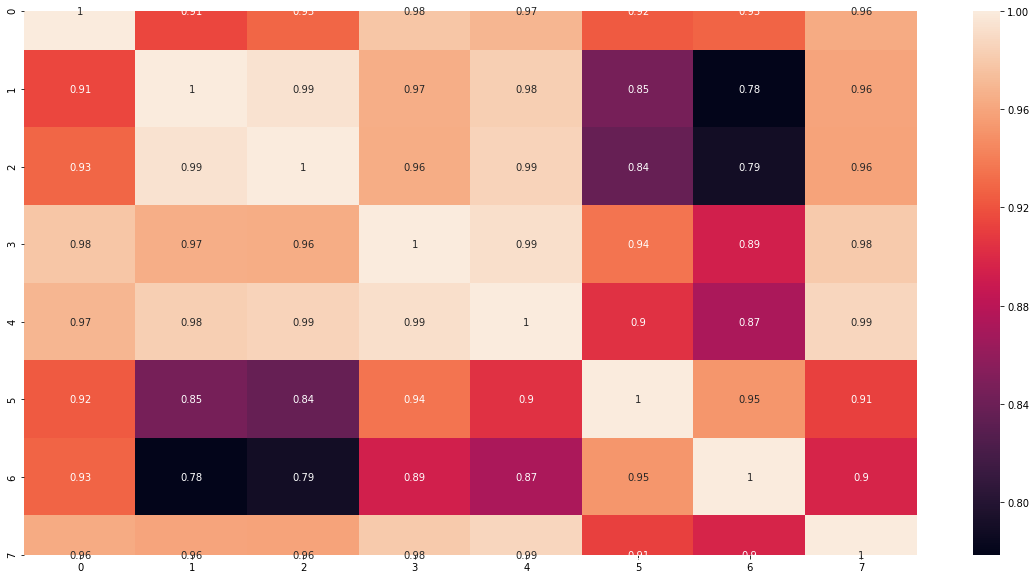

In [66]:
plt.figure(figsize=(20,10))
sb.heatmap(sample_corr_matrix,annot=True)